<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>

# **Курсова робота на тему "Метод спряжених напрямків Пауела"**

Виконала студентка групи КМ-81, Сохацька Софія

## Зміст


* Вступ
* Матеріали та методи
* Вирішення проблеми 
  * Імпорт бібліотек
  * Визначення констант
  * Визначення функцій
  * Розрахунки
  * Вивід результатів
* Висновки
* Посилання


## Вступ



Мета даної лабораторної роботи - дослідити збіжність метода спряжених напрямів Пауелла при мінімізації функції Розенброка  в залежності від:
1.	Виду метода одновимірного пошуку (ДСК-Пауелла або Золотого перетину).
2.	Точності метода одновимірного пошуку.
3.	Значення параметру в алгоритмі Свена.


## Матеріали та методи

Для мінімізації функції Розенброка в даному дослідженні використовується метод спряжених направлень Пауела. У методі Пауела, який є розвитком алгоритму Сміта, визначається місцезнаходження мінімуму деякої квадратичної функцяі f(х) при Н>0 шляхом проведення послідовних одновимірних пошуків, починаючи з точки х, уздовж системи отриманих спряжених напрямків.  Два напрямки пошуку s називаються сопряженними, якщо.
$$(s_j)^T Qs_i = 0,   i \ne j$$
$$(s_j)^T Qs_i  \geqslant 0, i = j$$

де $Q = \bigtriangledown^2f(х^k)$ - позитивно визначена квадратна матриця. Нижні індекси позначають вектори одного етапу (останні позначаються верхнім індексом). Ідея алгоритму Пауела полягає в тому, що якщо на даному етапі пошуку визначається мінімум квадратичної функцні f(х) уздовж кожного з р(p<n) пов'язаних напрямків і якщо потім в кожному напрямку робиться певний крок, то повне переміщення від початку до р-го кроку спряжене до всіх піднапрямів пошуку. Перехід з точки $x_0^k$ в точку $x_m^k$ х визначається формулою 
$$x_m^k = x_0^k + MSE = \sum\limits_{i=0}^{m-1} {\lambda_i^k s_i^k}, i = 1, ... m-1$$
Розрахункова процедура даного методу проводиться наступним чином. У точці $x_0^0$ в $E^n$ початкові напрямки $s_i^0, ..., s_n^0$ беруться паралельними координатаним вісям $E^n$. Перший крок робиться в напрямку $s_n^0$, тобто мінімізується в-ція $f(x_0^0 + \lambda s_n^0)$ по $\lambda$ за допомогою методів одномірного пошуку для обчислення $\lambda_0^0$. Далі береться $x_1^0 = x_0^0 + \lambda_0^0 s_n^0$. Далі вздовж кожного з n напрямків $s_i^0$, i= 1, ..., n в свою чергу мінімізуємо $f(x_i^0 + \lambda s_i^0)$, визначається відповідне \lambda_i^0 та послідовно визначаються за формулою нові значення $x_i^0$. Остаточний напямок визначається як різниця $(x_i^0 - x_1^0)$ та призначається замість напрямку $s_1^0$ для наступних ітерацій.

## Вирішення проблеми


### Імпорт бібліотек

In [ ]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D

### Визначення констант

In [ ]:
# Початкова точка
x1 = -1.2 
x2 = 0

#Точність методу Пауела
eps_p = 0.001

### Визначення функцій

Функції для підрахунку, власне, математичних функцій, що використовуються у роботі.

In [ ]:
# Функція для підрахунку функції Розенброка
def f(x1, x2):
    return ((1-x1)**2+100*((x2-(x1**2)))**2)

# Функція для підрахунку першої похідної за x від функції Розенброка
def f_x1(x1, x2):
    return (400*x1**3 - 400*x1*x2 + 2*x1 -2)

# Функція для підрахунку першої похідної за y від функції Розенброка
def f_x2(x1, x2):
    return (-200*x1**2 + 200*x2)
    
# Модифікована функція для підрахунку функції Розенброка з урахуванням векторів s
def f_modif(x1, x2, lambd,s1,s2):
    x1 = x1+lambd*s1
    x2 = x2+lambd*s2
    return f(x1, x2)

Функція для підрахунку критерію закінчення

In [ ]:
def norm_delta_f(x1, x2):
    return (sqrt(f_x1(x1, x2) * f_x1(x1, x2) + f_x2(x1, x2) * f_x2(x1, x2)))

Функція для підрахунку довжини кроку для алгоритму Свена

In [ ]:
def delta_lambd(x1, x2, s1, s2, a):
    return a*sqrt(x1*x1+x2*x2)/sqrt(s1*s1+s2*s2)

Функції для алгоритму Свена

In [ ]:
def sven(x1, x2, x0, delta, s1, s2):
    arr = []
    call_times = 0
    temp1 = x0 - delta
    temp2 = x0 + delta
    f_0 = f_modif(x1, x2, x0, s1, s2)
    f_1 = f_modif(x1, x2, temp1, s1, s2)
    f_2 = f_modif(x1, x2, temp2, s1, s2)
    call_times += 3
    if (f_1>f_2):
        arr.append([temp1, f_1])
        arr.append([x0, f_0])
        arr.append([temp2, f_2])
        x_past = x0
        x_curr = temp2
        f_past = f_0
        f_curr = f_2
        while (f_curr < f_past):
            delta = delta * 2
            x_past = x_curr
            x_curr = x_curr + delta
            f_past = f_curr
            f_curr = f_modif(x1, x2, x_curr, s1, s2)
            call_times += 1
            arr.append([x_curr, f_curr])
        x_last = x_past+(delta/2)
        f_last = f_modif(x1, x2, x_last, s1, s2)
        call_times += 1
        arr.append([x_last, f_last])
    else:
        arr.append([temp2, f_2])
        arr.append([x0, f_0])
        arr.append([temp1, f_1])
        x_past = x0
        x_curr = temp1
        f_past = f_0
        f_curr = f_1
        while (f_curr < f_past):
            delta = delta * 2
            x_past = x_curr
            x_curr = x_curr - delta
            f_past = f_curr
            f_curr = f_modif(x1, x2, x_curr, s1, s2)
            call_times += 1
            arr.append([x_curr, f_curr])
        x_last = x_past - (delta / 2)
        f_last = f_modif(x1, x2, x_last, s1, s2)
        call_times += 1
        arr.append([x_last, f_last])
    return (arr, call_times)

def sven_ans(arr):
    if arr[-1][1] < arr[-3][1]:
        return ([min(arr[-2][0], arr[-3][0]), max(arr[-2][0], arr[-3][0])])
    else:
        return ([min(arr[-1][0], arr[-4][0]), max(arr[-1][0], arr[-4][0])])

Функції для методу золотого перетину

In [ ]:
def GOLDEN_EXPERIENCE_base(t1, t2, a, b, x0, f_0, eps, s1, s2, call_times):
    L = b - a
    if (L >= eps):
        xm = (a + b) / 2
        if (x0 < xm):
            x1 = x0
            f_1 = f_0
            x2 = a + 0.618 * L
            f_2 = f_modif(t1, t2, x2, s1, s2)
            call_times += 1
        else:
            x1 = a + 0.382 * L
            f_1 = f_modif(t1, t2, x1, s1, s2)
            call_times += 1
            x2 = x0
            f_2 = f_0
        if (f_2 > f_1):
            return (GOLDEN_EXPERIENCE_base(t1, t2, a, x2, x1, f_1, eps, s1, s2, call_times))
        else:
            return (GOLDEN_EXPERIENCE_base(t1, t2, x1, b, x2, f_2, eps, s1, s2, call_times))
    else:
        ans = [a, b]
        return (ans, call_times)


def GOLDEN_EXPERIENCE(t1, t2, a, b, eps, s1, s2):
    call_times = 0
    L = b - a
    x1 = a + 0.382 * L
    x2 = a + 0.618 * L
    ans = 0
    f_1 = f_modif(t1, t2, x1, s1, s2)
    f_2 = f_modif(t1, t2, x2, s1, s2)
    if (f_2 > f_1):
        ans = GOLDEN_EXPERIENCE_base(t1, t2, a, x2, x1, f_1, eps, s1, s2, 2)[0]
        call_times = GOLDEN_EXPERIENCE_base(t1, t2, a, x2, x1, f_1, eps, s1, s2, 2)[1]
    else:
        ans = GOLDEN_EXPERIENCE_base(t1, t2, x1, b, x2, f_2, eps, s1, s2, 2)[0]
        call_times = GOLDEN_EXPERIENCE_base(t1, t2, x1, b, x2, f_2, eps, s1, s2, 2)[1]
    return (ans, call_times)

Функція для методу ДСК

In [ ]:
def dsk(t1, t2, x1, x3, eps, s1, s2):
    call_times = 0
    x2 = (x1 + x3) / 2
    delta_x = x2 - x1
    f_1 = f_modif(t1, t2, x1, s1, s2)
    f_2 = f_modif(t1, t2, x2, s1, s2)
    f_3 = f_modif(t1, t2, x3, s1, s2)
    x = x2 + ((delta_x*(f_1-f_3))/(2*(f_1-2*f_2 + f_3)))
    f_x = f_modif(t1, t2, x, s1, s2)
    call_times += 4
    crit1 = abs(f_2-f_x)
    crit2 = abs(x2 - x)
    if (x>x2):
        x1 = x2
        x2 = x
        f_1 = f_2
        f_2 = f_x
    elif (x<x2):
        x3 = x2
        x2 = x
        f_3 = f_2
        f_2 = f_x
    if ((crit1<=eps) and (crit2<=eps)):
        return (x, call_times)
    else:
        while (crit1>eps or crit2>eps or x!=x2):
            a1 = (f_2-f_1)/(x2-x1)
            if (a1==0):
                x = (x1+x2)/2
            else:
                a2 = (1/(x3-x2))*(((f_3-f_1)/(x3-x1))-((f_2-f_1)/(x2-x1)))
                x = (x1+x2)/2 - a1/(2*a2)
                f_x = f_modif(t1, t2, x, s1, s2)
                call_times += 1
            crit1 = abs(f_2 - f_x)
            crit2 = abs(x2 - x)
            if (x > x2):
                x1 = x2
                x2 = x
                f_1 = f_2
                f_2 = f_x
            elif (x < x2):
                x3 = x2
                x2 = x
                f_3 = f_2
                f_2 = f_x
        return (x, call_times)

Функції для методу спряжених напрямків Пауела

In [ ]:
# Функція для виконання одного кроку (побудови однієї точки) за методом спряжених напрямків Пауела
def pauell_step(x1, x2, s1, s2, eps, arr_x, arr_y,  call_times, method, k):
    delta = delta_lambd(x1, x2, s1, s2, k)
    arr = sven(x1, x2, 0, delta, s1, s2)[0]
    call_times += sven(x1, x2, 0, delta, s1, s2)[1]
    uncert_interv = sven_ans(arr)
    if (method == 'gold'):
        lambd_lim = GOLDEN_EXPERIENCE(x1, x2, uncert_interv[0], uncert_interv[1], eps, s1, s2)[0]
        call_times += GOLDEN_EXPERIENCE(x1, x2, uncert_interv[0], uncert_interv[1], eps, s1, s2)[1]
        lambd = (lambd_lim[0] + lambd_lim[1]) / 2
    else:
        lambd = dsk(x1, x2, uncert_interv[0], uncert_interv[1], eps, s1, s2)[0]
        call_times += dsk(x1, x2, uncert_interv[0], uncert_interv[1], eps, s1, s2)[1]
    x1 = x1 + lambd * s1
    x2 = x2 + lambd * s2
  
    return (x1, x2, arr_x, arr_y, call_times)



# Функція для основного алгоритму методу спряжених напрямків Пауела
def pauell(x1, x2, eps, eps_p, method, k):
    steps = 0
    arr_x = [x1]
    arr_y = [x2]
    call_times = 0
    s_arr = [[1, 0], [0, 1]]
    term_crit = 1000000000000
    while(term_crit>eps_p):
        x1, x2, arr_x, arr_y, call_times= pauell_step(x1, x2, s_arr[1][0], s_arr[1][1], eps, arr_x, arr_y, call_times, method, k)
        arr_x.append(x1)
        arr_y.append(x2)
        x1, x2, arr_x, arr_y, call_times = pauell_step(x1, x2, s_arr[0][0], s_arr[0][1], eps, arr_x, arr_y, call_times, method, k)
        arr_x.append(x1)
        arr_y.append(x2)
        x1, x2, arr_x, arr_y, call_times = pauell_step(x1, x2, s_arr[1][0], s_arr[1][1], eps, arr_x, arr_y, call_times, method, k)
        arr_x.append(x1)
        arr_y.append(x2)
        
        s_new1 = arr_x[-1] - arr_x[-3]
        s_new2 = arr_y[-1] - arr_y[-3]
        x1, x2, arr_x, arr_y, call_times = pauell_step(x1, x2, s_new1, s_new2, eps, arr_x, arr_y, call_times,method, k)
        if ((f(x1, x2)<f(arr_x[-3], arr_y[-3]))):
            arr_x.append(x1)
            arr_y.append(x2)
            s_arr[0][0] = s_arr[1][0]
            s_arr[0][1] = s_arr[1][1]

            s_arr[1][0] = s_new1
            s_arr[1][1] = s_new2

        steps +=1
        term_crit = norm_delta_f(x1, x2)

    return (arr_x, arr_y, call_times, steps)

Функція для демонстрації роботи методу спряжених напрямків Пауела

In [ ]:
def show_plot(arr_x, arr_y):
    x1, y1 = np.mgrid[-150:150, -150:300]/100
    z = f(x1, y1)

    x2 = arr_x
    y2 = arr_y

    fig, ax = plt.subplots()
    #ax.contourf(x1, y1, z)
    ax.contour(x1, y1, z, 250)      
    fig.set_figwidth(16)
    fig.set_figheight(8)
    ax.plot(x2, y2, 'rx', linestyle='solid')

    plt.show()

Функції для підрахунку оптимальних параметрів алгоритмів, що використовуються у методі спряжених напрямків Пауела

In [ ]:
# Функція для оптимізації коефіцієнту k для функції підрахунку кроку для алгоритму Свена
def compare_k(x1, x2, eps, eps_p, method, a, b, step):
    a_arr = np.arange(a, b, step)
    call_times_arr = []
    for i in a_arr:
        call_times = pauell(x1, x2, eps, eps_p, method, i)[2]
        call_times_arr.append(call_times)
    plt.figure(figsize=(14, 7))
    plt.title(f"Найкраще значення параметру а - {a_arr[call_times_arr.index(min(call_times_arr))]}")
    plt.plot(a_arr, call_times_arr)
    plt.xlabel("Значення а")
    plt.ylabel("К-ть викликів функції")
    plt.show()

# Функція для оптимізації точності для методів одновимірного пошуку
def compare_eps(x1, x2, eps_p, method, delta_a, a, b, step):
    eps_arr = np.arange(a, b, step)
    call_times_arr = []
    for i in eps_arr:
        call_times = pauell(x1, x2, i, eps_p, method, delta_a)[2]
        call_times_arr.append(call_times)
    plt.figure(figsize=(14, 7))
    plt.title(f"Найкраще значення параметру k - {eps_arr[call_times_arr.index(min(call_times_arr))]}")
    plt.plot(eps_arr, call_times_arr)
    plt.xlabel("Значення точності")
    plt.ylabel("К-ть викликів функції")
    plt.show()

# Функція для оптимізації вибору методу одновимірного пошуку
def compare_metods(x1, x2, eps, eps_p, k):
    call_times_arr = [0, 0]
    call_times_arr[0] = pauell(x1, x2, eps, eps_p, 'gold', k)[2]
    call_times_arr[1] = pauell(x1, x2, eps, eps_p, 'dsk', k)[2]
    plt.figure(figsize=(14, 7))
    plt.bar(['Золотого перетину', 'ДСК'], call_times_arr)
    plt.xlabel("Значення точності")
    plt.ylabel("К-ть викликів функції")
    plt.show()

## Підрахунки

Для початку виведемо порівняння, як працює алгоритм Пауела в залежності від обраного методу одномірного пошуку

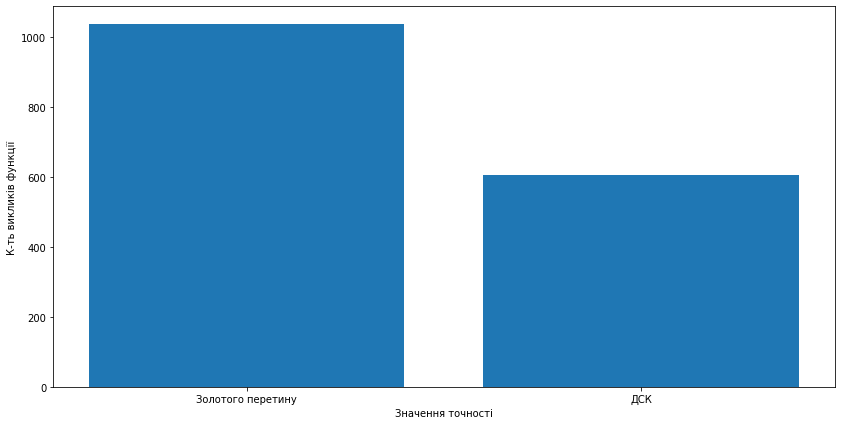

In [ ]:
compare_metods(x1, x2, eps_p, eps_p, 0.1)

ДСК показав себе набагато краще, то ж в наступних достілженнях будемо використовувати його. Тепер дослідимо оптимальне значення 

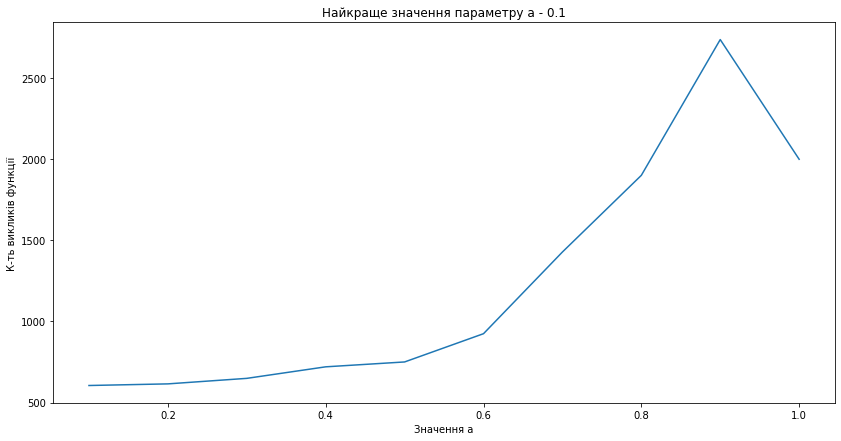

In [ ]:
best_method = 'dsk'
compare_k(x1, x2, eps_p,  eps_p, best_method, 0.1, 1.1, 0.1)

Найкраще значення виявилося на межі проміжку, що перевірявся. Проведемо додаткове дослідження, змістивси проміжок та підвищивши точність.

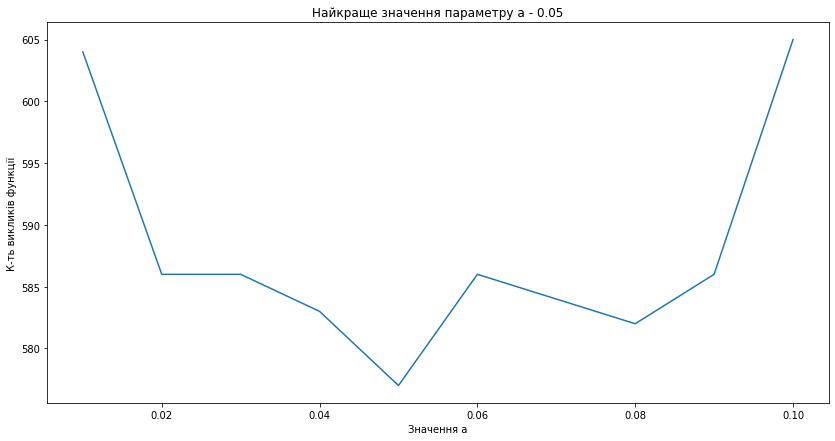

In [ ]:
compare_k(x1, x2, eps_p,  eps_p, best_method, 0.01, 0.11, 0.01)

Отже, отптимальне значення k = 0.05. Використовуючи це значення параметру, дослідимо оптимальну точність методів одномірного пошуку.

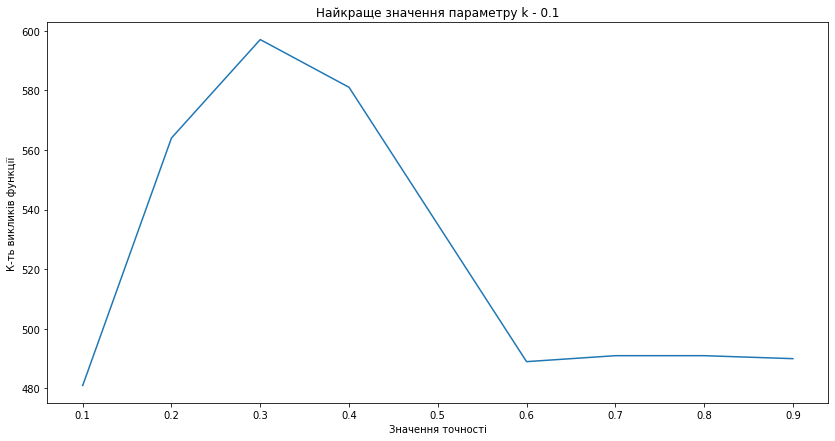

In [ ]:
best_k = 0.05
compare_eps(x1, x2, eps_p, best_method, best_k, 0.1, 1, 0.1)

І знову найкраще значення виявилося на межі. Проведемо більш детальний аналіз.

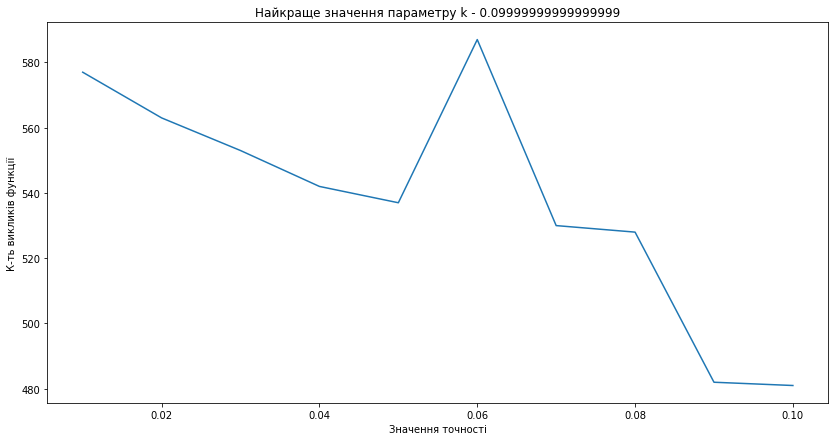

In [ ]:
compare_eps(x1, x2, eps_p, best_method, best_k, 0.01, 0.11, 0.01)

І все ж, найкраще значення цього параметру - 0.1


In [ ]:
best_eps = 0.1

## Вивід результатів

Використовуючи досліджені оптимальні параметри, продемонструємо роботу методу спряжених напрямків Пауела. Для наглядності також продемонструємо нашу функцію.

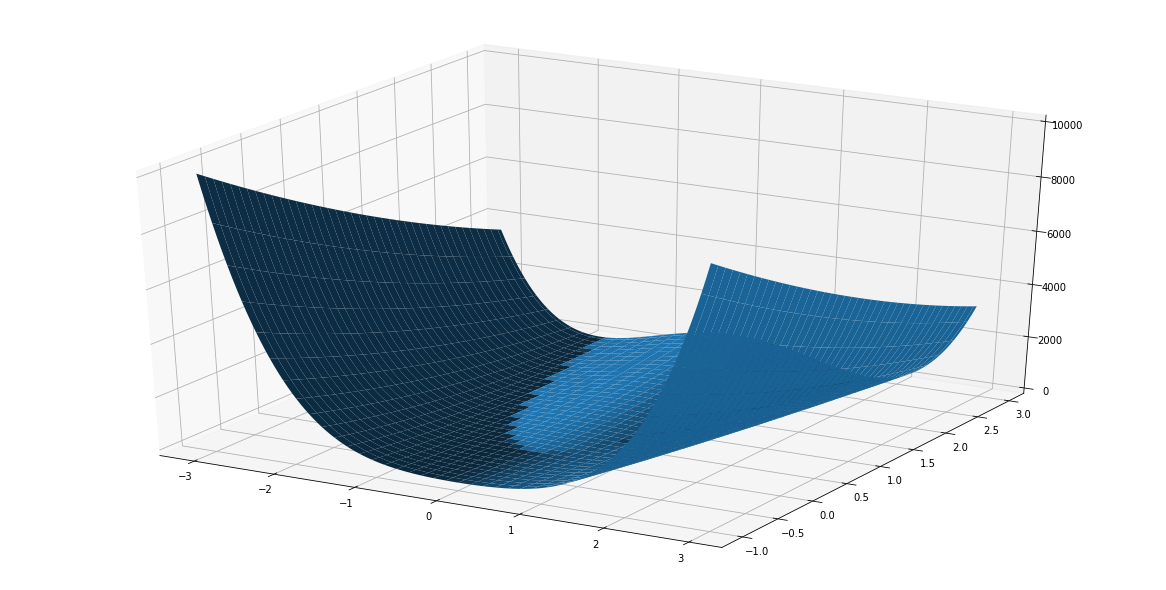

In [ ]:
x = np.arange(-3, 3, 0.05)
y = np.arange(-1, 3, 0.05)
xgrid, ygrid = np.meshgrid(x, y)
zgrid = f(xgrid, ygrid)

fig = pylab.figure()    
fig.set_figwidth(16)
fig.set_figheight(8)
axes = Axes3D(fig)

axes.plot_surface(xgrid, ygrid, zgrid)

pylab.show()

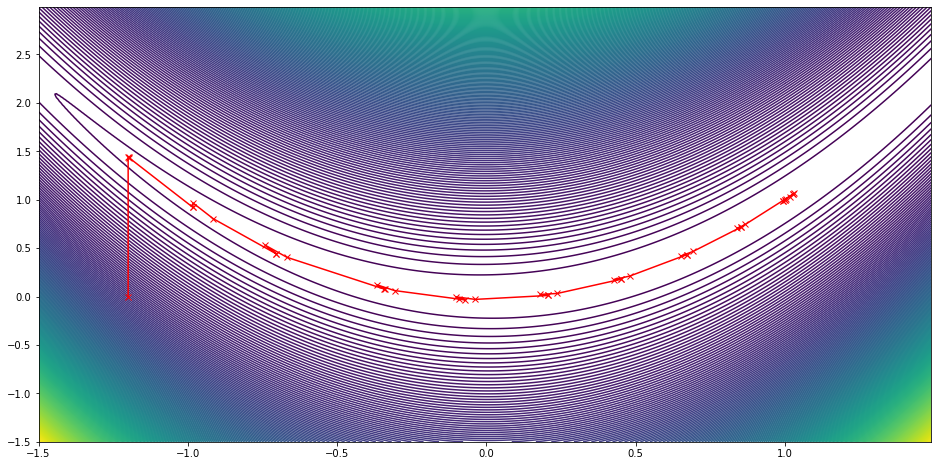

Кількість викликів функції - 481
Кількість ітерацій - 11
Остаточно знайдена точка: (0.9999384522704198, 0.9998761588026955)


In [ ]:
arr_x, arr_y, call_times, steps = pauell(x1, x2, best_eps, eps_p, best_method, best_k)
show_plot(arr_x, arr_y)
print(f"Кількість викликів функції - {call_times}")
print(f"Кількість ітерацій - {steps}")
print(f"Остаточно знайдена точка: ({arr_x[-1]}, {arr_y[-1]})")

Спробуємо значно збільшити точність обчислення та подивимося, наскільки збільшиться кількість ітерацій.

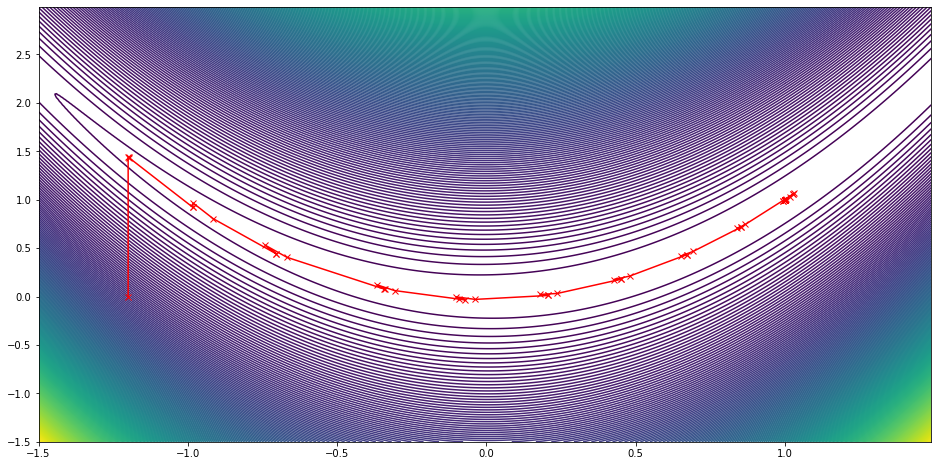

Кількість викликів функції - 781
Кількість ітерацій - 17
Остаточно знайдена точка: (1.0, 1.0)


In [ ]:
arr_x, arr_y, call_times, steps = pauell(x1, x2, best_eps, 0.000000001, best_method, best_k)
show_plot(arr_x, arr_y)
print(f"Кількість викликів функції - {call_times}")
print(f"Кількість ітерацій - {steps}")
print(f"Остаточно знайдена точка: ({arr_x[-1]}, {arr_y[-1]})")

Як ми можемо побачити, кількість ітерацій збільшилася лише у півтора рази, тоді як точність збільшилася у $10^6$ разів. 

## Висновки

В ході виконання курсової роботи було досліджено та оптимізовано під задану функцію Розенброка метод спряжених градієнтів Пауела. Були отримані такі оптимальні параметри:

Точність методів одновимірношо пошуку: 0.1

Коефіцієнт для пошуку кроку: 0.05

Вид методу одновимірного пошуку: ДСК

Остаточно знайдена точка: (1.0, 1.0) при заданій точності $10^{-9}$. При цьому було здійснено 17 ітерацій методу з загальною кількістю викликів функціїї у всіх задіяних методах, що дорівнює 781.

## Посилання

1. Прикладное нелинейное программирование, Д. Химмельблау
2.Методы оптимизации. Лемешко Борис Юрьевич